LOADING THE DATASET

In [36]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


BASIC INFO ABOUT DATASET

In [37]:
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)


Train dataset shape: (891, 12)
Test dataset shape: (418, 11)


In [38]:
print(train.info())
print("\nMissing values:\n", train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked    

In [39]:
print(test.info())
print("\nMissing values:\n", test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

Missing values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


HANDLING MISSING VALUES

In [40]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

test['Fare'].fillna(train['Fare'].median(), inplace=True)

test['Age'].fillna(test['Age'].median(), inplace=True)

train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

/tmp/ipython-input-2192889705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipython-input-2192889705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [41]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [42]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


EDA

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
def add_labels(ax):
    total = len(train)
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f"{count}",
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')


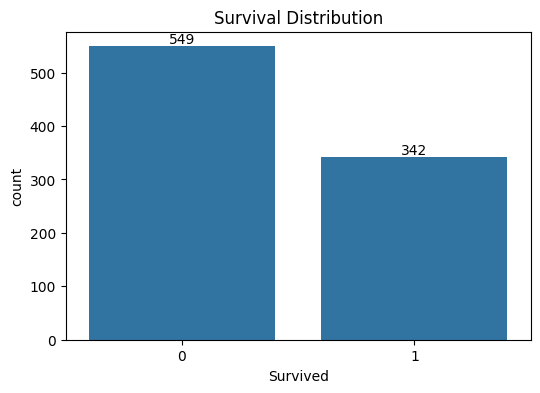

In [45]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=train, x='Survived')
plt.title("Survival Distribution")
add_labels(ax)
plt.show()


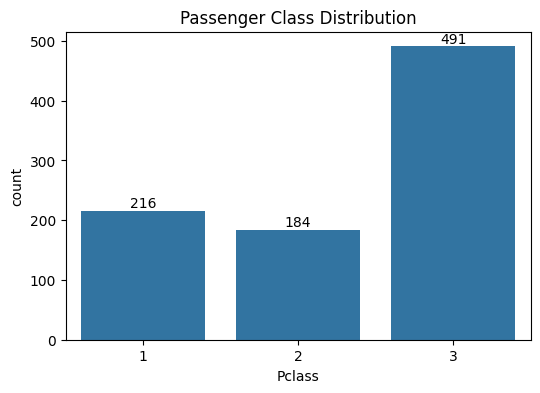

In [46]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=train, x='Pclass')
plt.title("Passenger Class Distribution")
add_labels(ax)
plt.show()


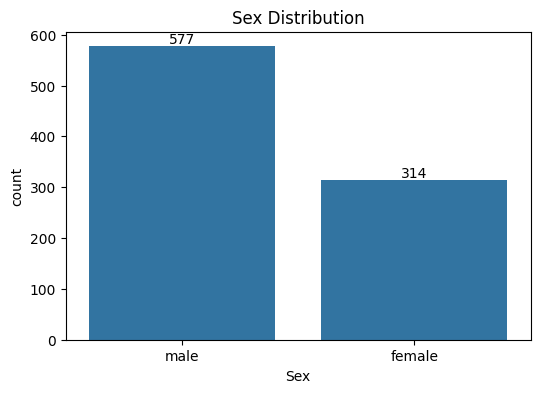

In [47]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=train, x='Sex')
plt.title("Sex Distribution")
add_labels(ax)
plt.show()


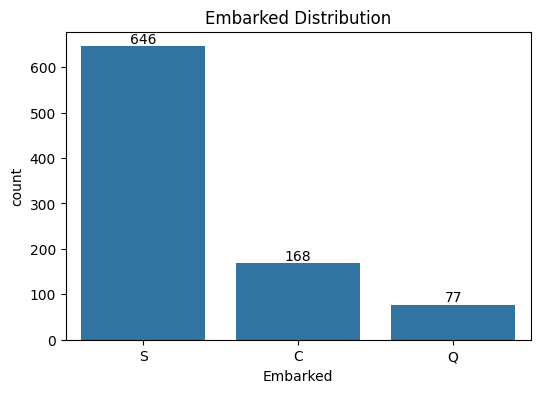

In [48]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=train, x='Embarked')
plt.title("Embarked Distribution")
add_labels(ax)
plt.show()


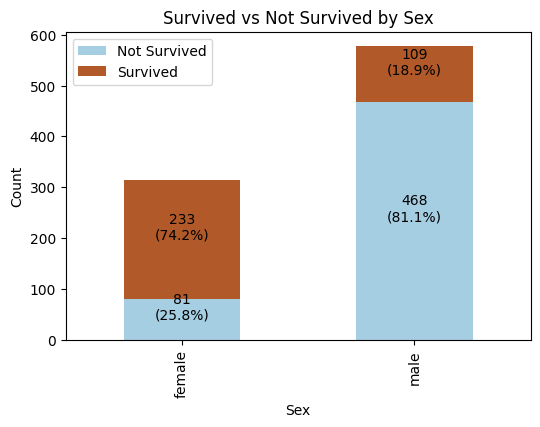

In [49]:
stacked = train.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

ax = stacked.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Paired')

plt.title("Survived vs Not Survived by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

for i, sex in enumerate(stacked.index):
    total = stacked.loc[sex].sum()
    ns = stacked.loc[sex, 0]
    s = stacked.loc[sex, 1]

    plt.text(i, ns/2, f"{ns}\n({ns/total*100:.1f}%)", ha='center', color='black')
    plt.text(i, ns + s/2, f"{s}\n({s/total*100:.1f}%)", ha='center', color='black')

plt.legend(['Not Survived', 'Survived'])
plt.show()


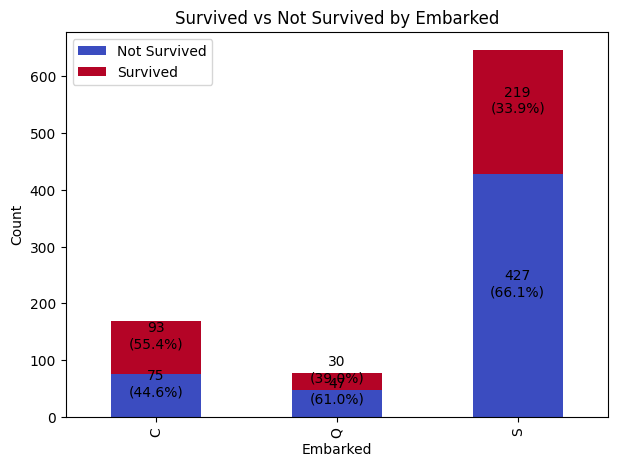

In [50]:
stacked = train.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

ax = stacked.plot(kind='bar', stacked=True, figsize=(7,5), colormap='coolwarm')

plt.title("Survived vs Not Survived by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")

for i, port in enumerate(stacked.index):
    total = stacked.loc[port].sum()
    ns = stacked.loc[port, 0]
    s = stacked.loc[port, 1]

    plt.text(i, ns/2, f"{ns}\n({ns/total*100:.1f}%)", ha='center')
    plt.text(i, ns + s/2, f"{s}\n({s/total*100:.1f}%)", ha='center')

plt.legend(['Not Survived', 'Survived'])
plt.show()


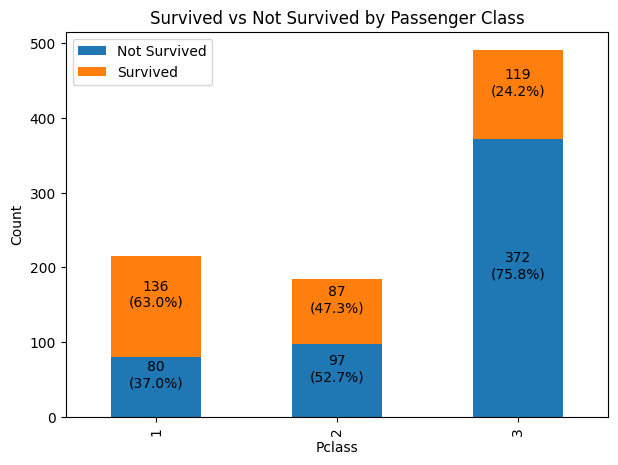

In [51]:
stacked = train.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

ax = stacked.plot(kind='bar', stacked=True, figsize=(7,5))

plt.title("Survived vs Not Survived by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")

for i, cls in enumerate(stacked.index):
    total = stacked.loc[cls].sum()
    ns = stacked.loc[cls, 0]
    s = stacked.loc[cls, 1]

    plt.text(i, ns/2, f"{ns}\n({ns/total*100:.1f}%)", ha='center')
    plt.text(i, ns + s/2, f"{s}\n({s/total*100:.1f}%)", ha='center')

plt.legend(['Not Survived', 'Survived'])
plt.show()


/tmp/ipython-input-907022808.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked = train.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)


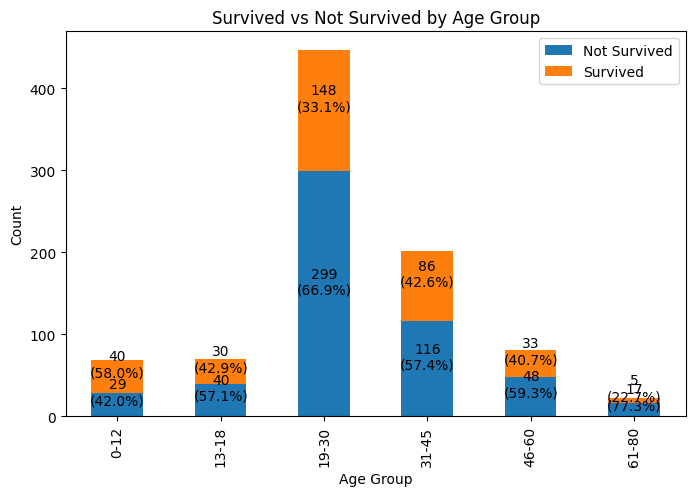

In [52]:
age_bins = [0, 12, 18, 30, 45, 60, 80]
train['AgeGroup'] = pd.cut(train['Age'], bins=age_bins, labels=[
    "0-12", "13-18", "19-30", "31-45", "46-60", "61-80"
])

stacked = train.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

ax = stacked.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title("Survived vs Not Survived by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

for i, grp in enumerate(stacked.index):
    total = stacked.loc[grp].sum()
    if total == 0:
        continue

    ns = stacked.loc[grp, 0]
    s = stacked.loc[grp, 1]

    plt.text(i, ns/2, f"{ns}\n({ns/total*100:.1f}%)", ha='center')
    plt.text(i, ns + s/2, f"{s}\n({s/total*100:.1f}%)", ha='center')

plt.legend(['Not Survived', 'Survived'])
plt.show()


CATEGORICAL ENCODING

In [53]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
train['Sex'] = le_sex.fit_transform(train['Sex'])
test['Sex'] = le_sex.transform(test['Sex'])

le_emb = LabelEncoder()
train['Embarked'] = le_emb.fit_transform(train['Embarked'])
test['Embarked'] = le_emb.transform(test['Embarked'])

In [54]:
features = ['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']
X = train[features]
y = train['Survived']


TRAIN TEST SPLIT

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Training model

In [56]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [57]:
from sklearn.svm import SVC
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

testing model

In [59]:
features = ['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']
X_test_final = test[features]


In [60]:
from sklearn.metrics import classification_report, accuracy_score
log_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



In [61]:
rf_pred = rf.predict(X_test)
print("Random forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [62]:
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.6424581005586593
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       110
           1       0.54      0.49      0.52        69

    accuracy                           0.64       179
   macro avg       0.62      0.61      0.62       179
weighted avg       0.64      0.64      0.64       179



MODEL COMPARISON

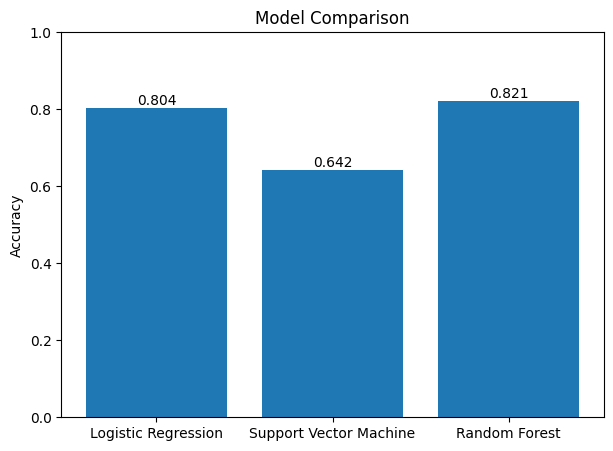

In [63]:
accuracies = {
    'Logistic Regression': accuracy_score(y_test, log_pred),
    'Support Vector Machine': accuracy_score(y_test, svm_pred),
    'Random Forest': accuracy_score(y_test, rf_pred)
}

plt.figure(figsize=(7,5))
bars = plt.bar(accuracies.keys(), accuracies.values())

plt.ylabel("Accuracy")
plt.title("Model Comparison")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f"{height:.3f}",
             ha='center',
             va='bottom',
             fontsize=10)

plt.ylim(0, 1)
plt.show()


In [64]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=False
)

stack_clf.fit(X_train, y_train)

stack_pred = stack_clf.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, stack_pred))
print(classification_report(y_test, stack_pred))


Stacking Classifier Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179

